In [3]:
!pip install pycocotools
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pdb
import os
from pycocotools.coco import COCO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 7.3 MB/s eta 0:00:00a 0:00:01


In [46]:
train_img_path = '/kaggle/input/coco-2017-dataset/coco2017/train2017'
val_img_path = '/kaggle/input/coco-2017-dataset/coco2017/val2017'
train_ann_path = '/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_train2017.json'
val_ann_path = '/kaggle/input/coco-2017-dataset/coco2017/annotations/captions_val2017.json'

In [48]:
with open(train_ann_path, 'r') as f:
    data = json.load(f)
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

**Info about image/class**

In [50]:
from statistics import mean
# height, width
heights = [img['height'] for img in data['images']]
widths = [img['width'] for img in data['images']]

num_images = len(data['images'])
num_boxes = len(data['annotations'])


print("Number of images: " , num_images)
print("Number of bounding boxes: ", num_boxes)
print("Min - Max - AVG Height: ", min(heights), max(heights), round(mean(heights),3))
print("Min - Max - AVG Width: ", min(widths), max(widths), round(mean(widths),3))

Number of images:  118287
Number of bounding boxes:  860001
Min - Max - AVG Height:  51 640 484.099
Min - Max - AVG Width:  59 640 577.712


In [51]:
print(data['annotations'][0])
print(data['images'][0])

{'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156}
{'license': 3, 'file_name': '000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}


**Distribution of captions across images**

In [52]:
img2boxes = {} 

for ann in data['annotations']:
    img_id = ann['image_id']
    
    if img_id in img2boxes.keys():
        img2boxes[img_id] += 1
    else:
        img2boxes[img_id] = 1

nboxes_list = list(img2boxes.values())

min_nboxes = min(nboxes_list)
max_nboxes = max(nboxes_list)
avg_nboxes = round(mean(nboxes_list),3)

print(nboxes_list)

[11, 9, 19, 22, 2, 4, 8, 3, 3, 17, 2, 10, 10, 2, 3, 3, 5, 8, 8, 5, 2, 3, 1, 1, 5, 3, 2, 3, 20, 3, 4, 7, 7, 4, 2, 19, 7, 3, 6, 3, 16, 3, 10, 8, 2, 7, 10, 8, 4, 26, 11, 3, 9, 3, 26, 3, 7, 6, 3, 3, 4, 7, 10, 5, 3, 3, 5, 3, 4, 4, 4, 2, 1, 7, 6, 4, 13, 4, 4, 5, 3, 1, 5, 5, 4, 9, 17, 2, 3, 17, 3, 2, 2, 3, 3, 7, 2, 3, 4, 16, 2, 9, 16, 4, 2, 9, 8, 5, 7, 3, 13, 29, 10, 4, 3, 3, 6, 4, 6, 6, 3, 6, 7, 7, 8, 3, 14, 2, 12, 2, 3, 15, 10, 1, 1, 3, 3, 10, 2, 2, 8, 15, 7, 7, 1, 3, 7, 7, 4, 12, 3, 4, 3, 3, 10, 4, 11, 12, 4, 19, 9, 16, 16, 17, 31, 12, 10, 20, 11, 4, 7, 6, 22, 5, 14, 15, 13, 11, 7, 18, 4, 12, 6, 10, 52, 20, 3, 16, 3, 10, 8, 10, 19, 7, 7, 25, 16, 7, 11, 10, 5, 9, 23, 5, 15, 9, 4, 17, 4, 12, 4, 15, 3, 9, 43, 4, 9, 10, 8, 16, 6, 18, 38, 17, 2, 14, 7, 11, 7, 16, 15, 21, 9, 6, 10, 23, 2, 4, 3, 6, 15, 17, 8, 24, 26, 12, 5, 56, 5, 13, 5, 7, 7, 17, 6, 18, 7, 9, 12, 7, 29, 13, 12, 5, 4, 16, 5, 24, 8, 5, 11, 9, 12, 14, 7, 5, 24, 5, 19, 14, 18, 6, 7, 46, 7, 5, 10, 5, 12, 2, 9, 25, 7, 22, 10, 6, 9, 7,

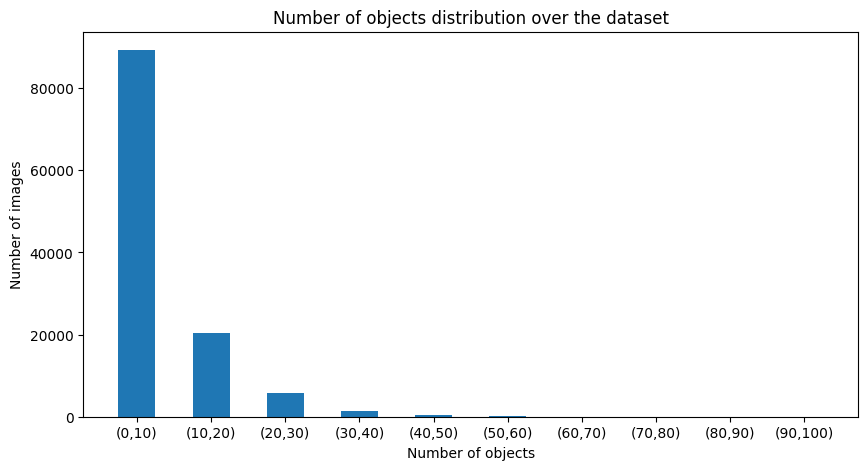

Number of images having atleast one box:  117266
Min number of boxes per image:  1
Max number of boxes per image:  93
Avg number of boxes per image:  7.334


In [53]:
out = pd.cut(nboxes_list, bins = np.arange(0,max_nboxes+10,10), include_lowest=True)

counts = out.value_counts().values
labels = [(int(i.left),int(i.right)) for i in out.value_counts().index.categories]

graph_xind = [i[0] for i in labels] 
ticks = [ '('+str(i[0])+','+ str(i[1])+')' for i in labels]

plt.figure(figsize=(10,5))
plt.bar(graph_xind, counts, tick_label=ticks, width=5)
plt.xlabel('Number of objects')
plt.ylabel('Number of images')
plt.title('Number of objects distribution over the dataset')
plt.show()

print("Number of images having atleast one box: ", len(nboxes_list))
print("Min number of boxes per image: ", min_nboxes)
print("Max number of boxes per image: ", max_nboxes)
print("Avg number of boxes per image: ", avg_nboxes)

**Class Distribution**

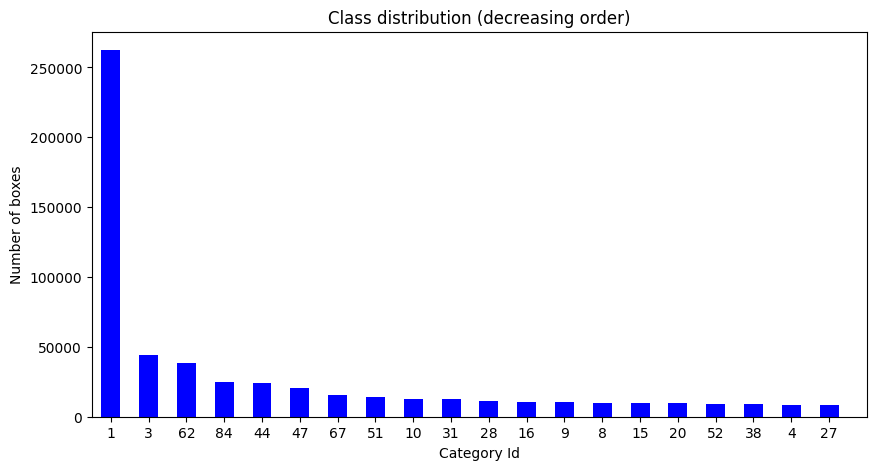

1 : person, 2 : bicycle, 3 : car, 4 : motorcycle, 5 : airplane, 6 : bus, 7 : train, 8 : truck, 9 : boat, 10 : traffic light, 11 : fire hydrant, 13 : stop sign, 14 : parking meter, 15 : bench, 16 : bird, 17 : cat, 18 : dog, 19 : horse, 20 : sheep, 21 : cow, 22 : elephant, 23 : bear, 24 : zebra, 25 : giraffe, 27 : backpack, 28 : umbrella, 31 : handbag, 32 : tie, 33 : suitcase, 34 : frisbee, 35 : skis, 36 : snowboard, 37 : sports ball, 38 : kite, 39 : baseball bat, 40 : baseball glove, 41 : skateboard, 42 : surfboard, 43 : tennis racket, 44 : bottle, 46 : wine glass, 47 : cup, 48 : fork, 49 : knife, 50 : spoon, 51 : bowl, 52 : banana, 53 : apple, 54 : sandwich, 55 : orange, 56 : broccoli, 57 : carrot, 58 : hot dog, 59 : pizza, 60 : donut, 61 : cake, 62 : chair, 63 : couch, 64 : potted plant, 65 : bed, 67 : dining table, 70 : toilet, 72 : tv, 73 : laptop, 74 : mouse, 75 : remote, 76 : keyboard, 77 : cell phone, 78 : microwave, 79 : oven, 80 : toaster, 81 : sink, 82 : refrigerator, 84 : boo

In [61]:
class2boxes = {} 

for ann in data['annotations']:
    cat_id = ann['category_id']
    
    if cat_id in class2boxes.keys():
        class2boxes[cat_id] += 1
    else:
        class2boxes[cat_id] = 1

sorted_c2nb = [(k,v) for k, v in sorted(class2boxes.items(), reverse = True, key = lambda item: item[1])]

# to plot
y = [i[1] for i in sorted_c2nb[:20]]
x = [i[0] for i in sorted_c2nb[:20]]

plt.figure(figsize=(10,5))
plt.bar(np.arange(len(y)),y, width=0.5,tick_label=x,color='blue')
plt.xlim(-0.5,len(y))
plt.xlabel('Category Id')
plt.ylabel('Number of boxes')
plt.title('Class distribution (decreasing order)')
plt.show()

categ_map = {x['id']: x['name'] for x in data['categories']}
for k in categ_map.keys():
    print(k,':',categ_map[k], end = ", ")

Viewing random images

ERROR: Could not find a version that satisfies the requirement coco_obj (from versions: none)
ERROR: No matching distribution found for coco_obj
loading annotations into memory...
Done (t=18.20s)
creating index...
index created!
['person', 'skateboard', 'skateboard']


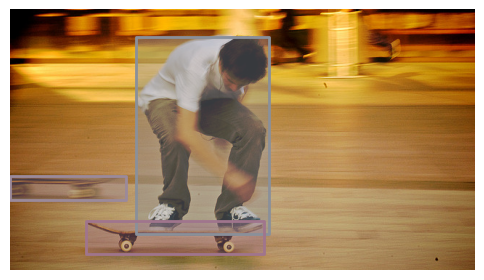

In [66]:
!pip install coco_obj
from skimage import io 

coco_obj = COCO(train_ann_path)

imgIds = [i['id'] for i in data['images']]
catIds = [i['id'] for i in data['categories']]
img = coco_obj.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]
img_path= os.path.join(train_img_path, img['file_name'])
img_show = io.imread(img_path)

# plot annotations
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(img_show)
annIds = coco_obj.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_obj.loadAnns(annIds)

#  disable segmentation
for a in anns:
    if 'segmentation' in a.keys():
        a['segmentation'] = []
coco_obj.showAnns(anns, draw_bbox=True)
classes = [categ_map[a['category_id']] for a in anns]
print(classes)